# Import libraries


In [77]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis

In [78]:
train_df = pd.read_csv('train.csv')

In [79]:
train_df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [80]:
train_df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


### Details about data

- Severity
       Highly_Fatal_And_Damaging  
       Significant_Damage_And_Serious_Injuries
       Minor_Damage_And_Injuries 
       Significant_Damage_And_Fatalities 
- Safety_Score
       It is a measure of how safe the plane was deemed to be before incident.
       Ranges from (0-100)%
- Days_Since_Inspection
       Number of days the plane went without inspection before the incident.
       Ranges from (1-23) days.
- Total_Safety_Complaints
       Number of complaints from mechanics prior to the accident.
       Ranges from (0-54)
- Control_Metric
       An estimation of how much control the pilot had during the incident given the factors at play.   
       Ranges from (0-100)
- Turbulence_In_gforces 
       Turbulence is a sudden change in airflow.
       In severe turbulence, the readings would range from + 0.4 G to +1.6 G.
       Ranges from (0-1)
- Cabin_Temperature
       The last recorded temperature before the incident.
       Ranges from (74-97) degrees fahrenheit.
       Normal airplane will have  temperature ranging from 73 to 77 degrees Fahrenheit.
- Accident_Type_Code
       The type of accident.(7 types of accident)
- Max_Elevation
       Elevation is the measure of height above the land.
       Maximum elevation is the maximum height the airplane had reached above the land.  
- Violations
       Number of violations that the aircraft received during inspections.
       ranges from (0-5).
- Adverse_Weather_Metric
       It is a measure of how good is the weather.
- Accident_ID 
       Unique Id assigned to each row.

In [81]:
train_df.shape

(10000, 12)

- The dataset consists of 10000 data samples

# Missing values

In [82]:
train_df.isna().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

- There are no missing values in the dataset.

# Data Preprocessing 

### Mapping the dependent variable to numeric type:

In [83]:
train_df["Target"]=train_df.Severity.map({'Highly_Fatal_And_Damaging':1,'Significant_Damage_And_Serious_Injuries':2,'Minor_Damage_And_Injuries':3,'Significant_Damage_And_Fatalities':4})

In [84]:
train_df.drop('Severity',axis=1,inplace=True)
train_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Target
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570,3
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128,3
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181,4
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946,2
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054,4


### Dropping the Accident id:


Accident id doesnt provide a major impact on accident, therfore it is dropped.

In [85]:
train_df.drop('Accident_ID',axis=1,inplace=True)

# Data Visualization

(11.0, 0.0)

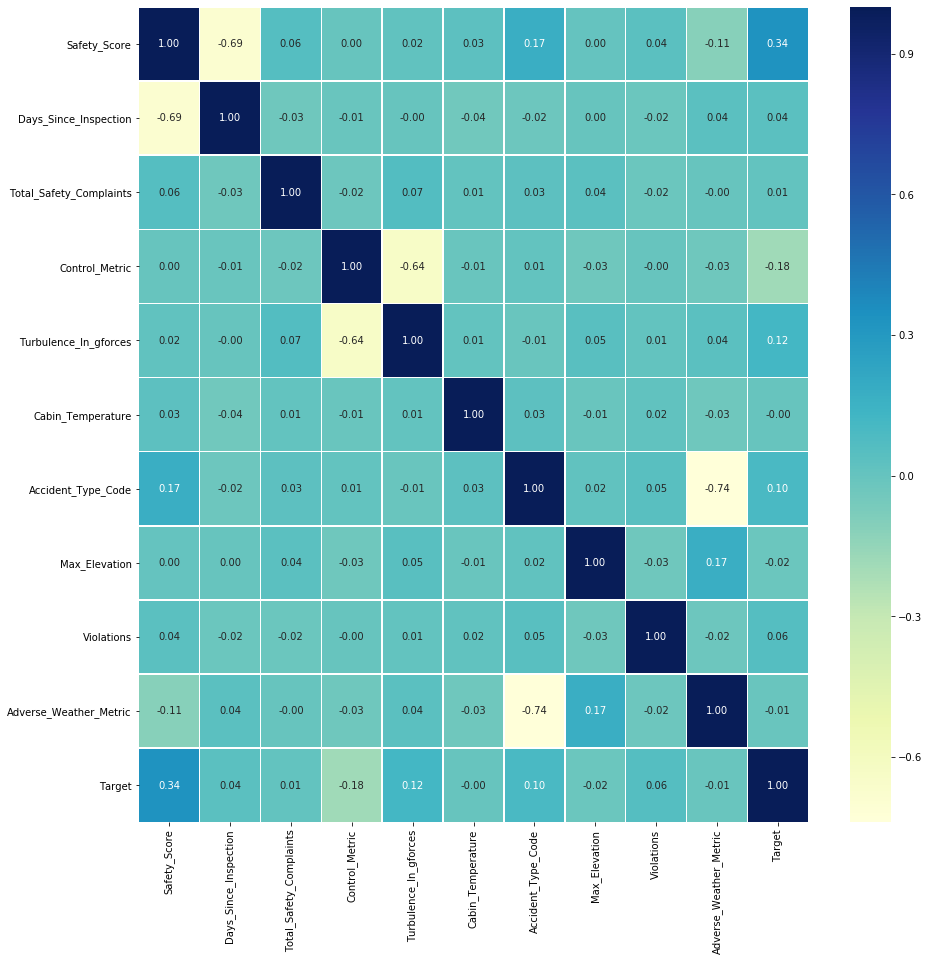

In [86]:
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Severity')

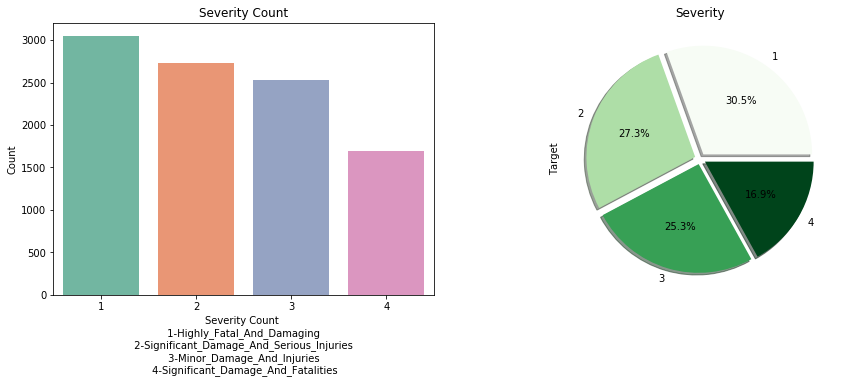

In [87]:
fig,ax=plt.subplots(1, 2, figsize = (15,5))
sns.countplot(data=train_df, x='Target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Severity Count \n 1-Highly_Fatal_And_Damaging \n 2-Significant_Damage_And_Serious_Injuries \n 3-Minor_Damage_And_Injuries \n 4-Significant_Damage_And_Fatalities")
ax[0].set_ylabel("Count")
ax[0].set_title("Severity Count")
train_df['Target'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Severity")

- The spread of severity in percentage is slighly equal to each other.

# Analyzing Categorical feaures

### Accident Type

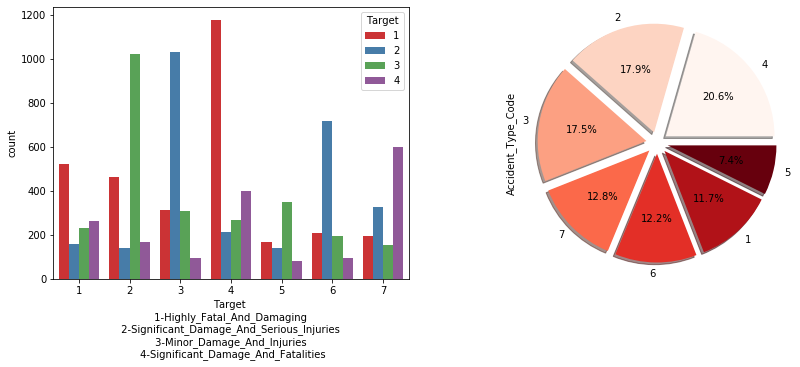

In [88]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Accident_Type_Code',data=train_df,hue='Target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Target \n 1-Highly_Fatal_And_Damaging \n 2-Significant_Damage_And_Serious_Injuries \n 3-Minor_Damage_And_Injuries \n 4-Significant_Damage_And_Fatalities")
train_df.Accident_Type_Code.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1], cmap='Reds')

- Type 4 accident causes high fataliy (i.e) leading to death

# Analyzing Continuous feaures

### Safety Score

Text(0, 0.5, 'Safety Sccore %')

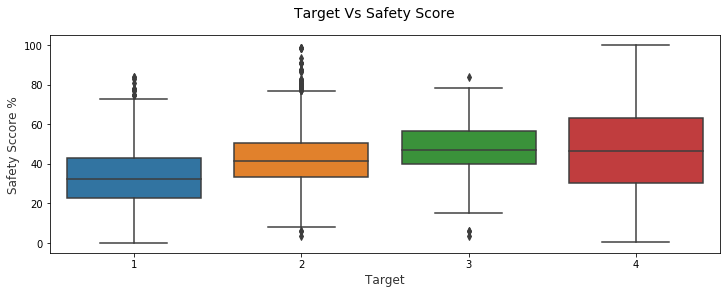

In [89]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Target Vs Safety Score', fontsize=14)

sns.boxplot(x="Target", y="Safety_Score", data=train_df,  ax=ax)
ax.set_xlabel("Target",size = 12,alpha=0.8)
ax.set_ylabel("Safety Sccore %",size = 12,alpha=0.8)


- Less safety score leads to high fatality.

### Control Metric

Text(0, 0.5, 'Control Metric %')

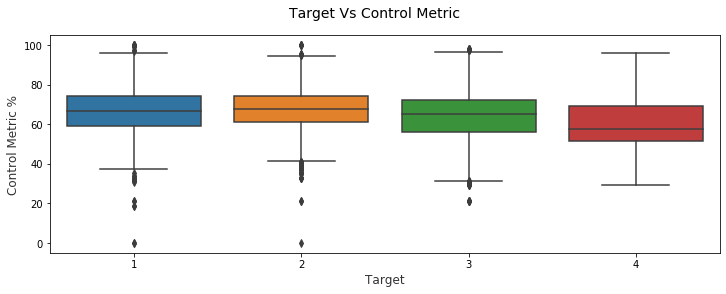

In [90]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Target Vs Control Metric', fontsize=14)

sns.boxplot(x="Target", y="Control_Metric", data=train_df,  ax=ax)
ax.set_xlabel("Target",size = 12,alpha=0.8)
ax.set_ylabel("Control Metric %",size = 12,alpha=0.8)


- The control metric in each type of severity founds to be same (i.e) It wont have major impact on the model.However control metric below 60% may cause fatality.

### Days Since Inspection

Text(0, 0.5, 'Days_Since_Inspection')

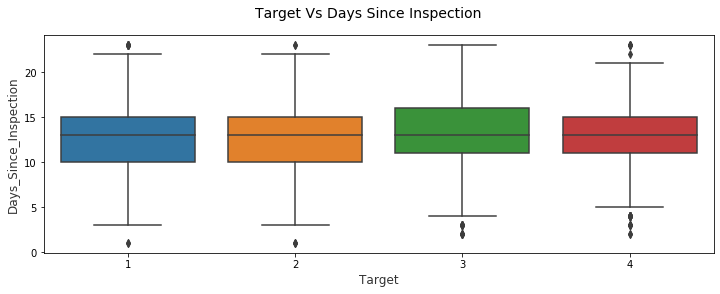

In [91]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Target Vs Days Since Inspection', fontsize=14)

sns.boxplot(x="Target", y="Days_Since_Inspection", data=train_df,  ax=ax)
ax.set_xlabel("Target",size = 12,alpha=0.8)
ax.set_ylabel("Days_Since_Inspection",size = 12,alpha=0.8)

- Days_Since_Inspection dosent make a huge impact on target 

### Turbulence In gforces

Text(0, 0.5, 'Turbulence_In_gforces')

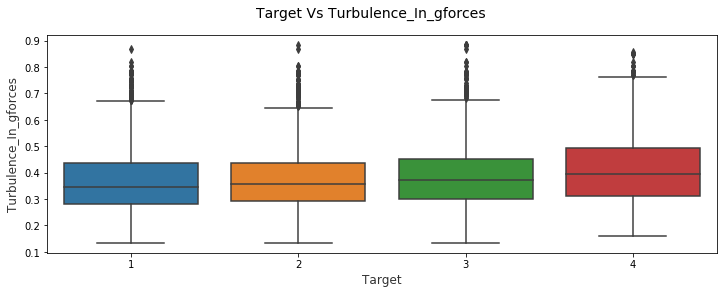

In [92]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Target Vs Turbulence_In_gforces', fontsize=14)

sns.boxplot(x="Target", y="Turbulence_In_gforces", data=train_df,  ax=ax)
ax.set_xlabel("Target",size = 12,alpha=0.8)
ax.set_ylabel("Turbulence_In_gforces",size = 12,alpha=0.8)

- slight increase in gforce measure can cause fatality.

# One hot encoding

In [93]:
a = pd.get_dummies(train_df['Accident_Type_Code'], prefix = "Accident_Type")

In [94]:
frames = [train_df, a]
train_df = pd.concat(frames, axis = 1)
train_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Target,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,3,0,1,0,0,0,0,0
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,3,0,1,0,0,0,0,0
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,4,0,0,0,0,0,0,1
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,2,0,0,1,0,0,0,0
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,4,0,0,1,0,0,0,0


In [95]:
train_df = train_df.drop(columns = ['Accident_Type_Code'])
train_df.head()


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Target,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.424352,3,0,1,0,0,0,0,0
1,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,0.352350,3,0,1,0,0,0,0,0
2,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,0.003364,4,0,0,0,0,0,0,1
3,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,0.211728,2,0,0,1,0,0,0,0
4,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,0.176883,4,0,0,1,0,0,0,0


# Train-Test split

In [96]:
X = train_df.iloc[:, train_df.columns != 'Target'].values
Y = train_df.iloc[:, train_df.columns == 'Target'].values.ravel()

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7000, 16)
(7000,)
(3000, 16)
(3000,)


# Modelling

### Logistic regression

In [98]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred = logreg.predict(X_test)
acc_logreg=logreg.score(X_test, Y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_logreg))


Accuracy of logistic regression classifier on test set: 0.60


### Support vector machine

In [100]:
SVM = SVC( kernel='linear')
SVM.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
y_pred = SVM.predict(X_test)
acc_SVM=SVM.score(X_test, Y_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(acc_SVM))

Accuracy of KNN classifier on test set: 0.64


### Decision Tree

In [102]:
decision_tree = DecisionTreeClassifier(max_depth=12)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
y_pred = decision_tree.predict(X_test)
acc_decision_tree=decision_tree.score(X_test, Y_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(acc_decision_tree))

Accuracy of Decision tree classifier on test set: 0.91


### Random Forest 

In [104]:

random_forest = RandomForestClassifier(criterion='entropy',max_features=8,n_estimators=1000)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
y_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_test, Y_test)
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(acc_random_forest))


Accuracy of Random forest classifier on test set: 0.94


# Compare Models

In [106]:
models = pd.DataFrame({
    'Model': ['Logistic regression', 'Support Vector Machine' ,
              'Decision Tree','Random Forest'],
    'Score': [acc_logreg*100, acc_SVM*100 ,
              acc_decision_tree*100, acc_random_forest*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,94.500000
2,Decision Tree,90.733333
1,Support Vector Machine,64.366667
0,Logistic regression,59.966667


- Random forest or Decision tree can be used for submission

# Submission 

In [107]:
test_df = pd.read_csv('test.csv')


In [108]:
test_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [112]:
Id = test_df.iloc[:,10]

In [116]:
test_df.drop('Accident_ID',axis=1,inplace=True)

In [117]:
a = pd.get_dummies(test_df['Accident_Type_Code'], prefix = "Accident_Type")

In [118]:
frames = [test_df, a]
test_df = pd.concat(frames, axis = 1)
test_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,0,0,0,1,0,0,0
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,0,0,0,0,0,0,1
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,0,0,0,0,0,1,0
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,0,0,1,0,0,0,0
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,0,1,0,0,0,0,0


In [121]:
test_df = test_df.drop(columns = ['Accident_Type_Code'])
test_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,19.497717,16,6,72.151322,0.388959,78.32,37949.724386,2,0.069692,0,0,0,1,0,0,0
1,58.173516,15,3,64.585232,0.250841,78.60,30194.805567,2,0.002777,0,0,0,0,0,0,1
2,33.287671,15,3,64.721969,0.336669,86.96,17572.925484,1,0.004316,0,0,0,0,0,1,0
3,3.287671,21,5,66.362808,0.421775,80.86,40209.186341,2,0.199990,0,0,1,0,0,0,0
4,10.867580,18,2,56.107566,0.313228,79.22,35495.525408,2,0.483696,0,1,0,0,0,0,0


In [123]:
decision_tree = DecisionTreeClassifier(max_depth=12)
decision_tree.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
y_pred = decision_tree.predict(test_df)

In [127]:
pd.DataFrame({'Accident_ID':Id,'Severity':y_pred}).set_index('Accident_ID').to_csv('submission.csv')

In [130]:
sub = pd.read_csv('submission.csv')

In [131]:
sub.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities
